In [154]:
from typing import List,Dict,Any
from toolz import curry
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from math import ceil,floor
# %matplotlib inline

In [1]:
def juros(valor,taxa):
    return valor*(1+taxa)

In [336]:
# fixed income
def renda_fixa(meses : int, contribuicao_mensal: float, taxa: float , valor: float) -> List[Any]:
    v_inicial = valor
    
    valores = list()
    valores.append(valor)
    
    for _ in range(1,meses): 
        valor=juros(valor+contribuicao_mensal, taxa)
        valores.append(valor)
    
    return valores

In [335]:
def fundo_imobiliario(meses:int, aporte_mensal:float, preco_fundo:float, rentabilidade_mensal:float, valor:float)->List[Any]: 
    v_inicial = valor
    
    valores = list()
    valores.append(valor)
    
    for _ in range(1,meses):
        qtdd = valor//preco_fundo
        acumulado = qtdd*rentabilidade_mensal
        valor += acumulado + aporte_mensal
        valores.append(valor)
        
    return valores, (valor//preco_fundo)*rentabilidade_mensal

In [337]:
def dividendo_acao(meses:int, aporte_mensal:float, preco_acao:float, dividendo_mensal:float, valor:float)->List[Any]: 
    v_inicial = valor
    
    valores = list()
    valores.append(valor)
    
    for _ in range(1,meses):
        qtdd = valor//preco_acao
        acumulado = qtdd*dividendo_mensal
        valor += acumulado + aporte_mensal
        valores.append(valor)
        
    return valores , (valor//preco_acao)*dividendo_mensal

In [402]:
@curry
def plot(vetor_prefixado:List, vetor_fundo_imobiliario:List, vetor_dividendo_acao:List, meses: int)-> Any:
    
    fig = plt.figure(figsize=(16,9))
    plt.plot(range(1,meses+1), vetor_prefixado ,color='c', label='Tesouro Prefixado')
    plt.plot(range(1,meses+1), vetor_fundo_imobiliario ,color='m' , label='Fundo Imobiliario')
    plt.plot(range(1,meses+1), vetor_dividendo_acao ,color='b', label='Dividendos (ações)')
    
    
    plt.xlabel('Meses', {'weight':'bold', 'fontsize': 13 });
    plt.ylabel('Reais (R$)', {'weight':'bold', 'fontsize': 13  });
    plt.xticks( ticks=range(0,meses+1,12), rotation='vertical' , fontsize=11, weight='bold', alpha=.7,);
    plt.yticks( fontsize=11, alpha=.7, weight='bold')

    plt.title("Rendimentos por tipos de investimento", fontsize=14, weight='bold');
    # Remove borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.5)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.5)  
    plt.grid(axis='both', alpha=.3)
    
    #make markers
    plt.annotate('{}'.format(round(vetor_prefixado[0],2)), xy=(0 ,vetor_prefixado[0]), xytext=(4, 4),
                textcoords="offset points",ha='center', va='bottom',
                color='tab:green', weight='bold', clip_on=True)
    
    plt.annotate('{}'.format(round(vetor_prefixado[-1],2)), xy=(meses, vetor_prefixado[-1]), xytext=(4, 4),
                textcoords="offset points",ha='center', va='bottom',
                color='c', weight='bold', clip_on=True)
    
    plt.annotate('{}'.format(round(vetor_fundo_imobiliario[-1],2)), xy=(meses, vetor_fundo_imobiliario[-1]), xytext=(4, 4),
                textcoords="offset points",ha='center', va='bottom',
                color='m', weight='bold', clip_on=True)
    
    plt.annotate('{}'.format(round(vetor_dividendo_acao[-1],2)), xy=(meses, vetor_dividendo_acao[-1]), xytext=(4, 4),
                textcoords="offset points",ha='center', va='bottom',
                color='b', weight='bold', clip_on=True)
    #legend
    plt.legend();

In [496]:
VALOR_INICIAL = 50000.0
MESES = 360
APORTE_MENSAL = 500.0

TAXA_PREFIXADA  = 0.0682/12 #Tesouro Prefixado com Juros Semestrais 2031 : 6,82% a.a

PRECO_FUNDO = 116.40 # VTLT11
RENTABILIDADE_MENSAL_FUNDO = 0.72 # reais 0.62% DY

DIVIDENDO = 1.89/12 # DIVIDENDO POR AÇÃO DA TAEE11 EM 2019 : 1.89 reais 
PRECO_ACAO =  29.74  # TAEE11 em 02/2020

# ---------------------------------------------------------------------------------------


In [497]:
valor_final_rf = renda_fixa(MESES,APORTE_MENSAL,TAXA_PREFIXADA,VALOR_INICIAL)

In [498]:
valor_final_fi, renda_mensal_fi = fundo_imobiliario(MESES,APORTE_MENSAL,PRECO_FUNDO,RENTABILIDADE_MENSAL_FUNDO,VALOR_INICIAL)

In [499]:
valor_final_da, renda_mensal_da = dividendo_acao(MESES,APORTE_MENSAL,PRECO_ACAO,DIVIDENDO,VALOR_INICIAL)

In [500]:
grafico = plot(valor_final_rf, valor_final_fi, valor_final_da)

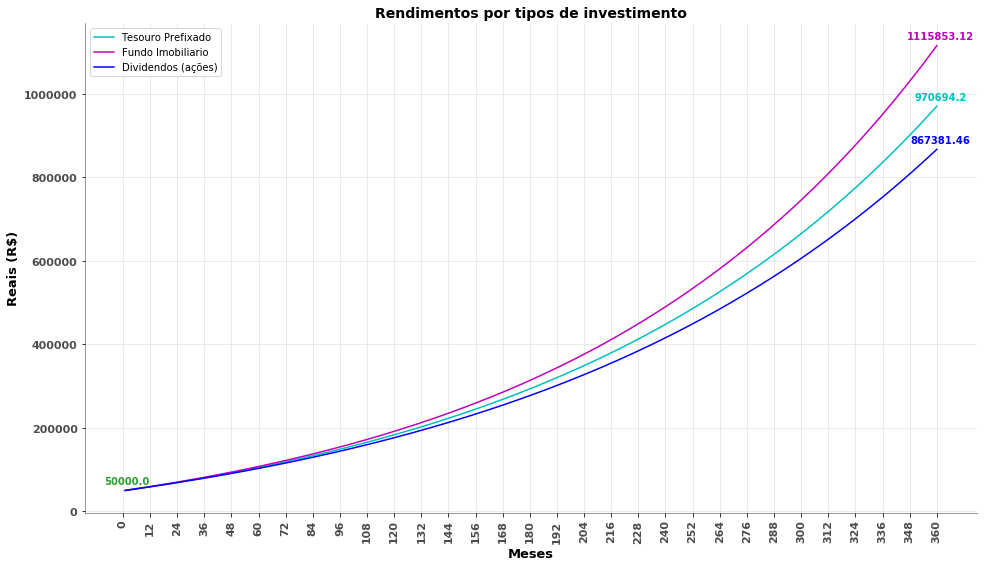

In [501]:
grafico(MESES)